In [307]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib

In [3]:
dataset=pd.read_csv('./train.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
dataset["Ticket"].value_counts()

1601            7
CA. 2343        7
347082          7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
W./C. 6608      4
349909          4
113781          4
4133            4
113760          4
17421           4
PC 17757        4
LINE            4
347077          4
2666            4
19950           4
248727          3
F.C.C. 13529    3
110152          3
C.A. 34651      3
347742          3
239853          3
35273           3
29106           3
PC 17760        3
345773          3
110413          3
               ..
112053          1
349218          1
347076          1
335097          1
349243          1
349256          1
334912          1
349241          1
29011           1
7553            1
C 17369         1
PC 17474        1
248747          1
312991          1
C 7077          1
28551           1
8471            1
113804          1
A.5. 18509      1
29108           1
231945          1
PC 17475        1
350046          1
A/5. 851        1
13509     

In [8]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

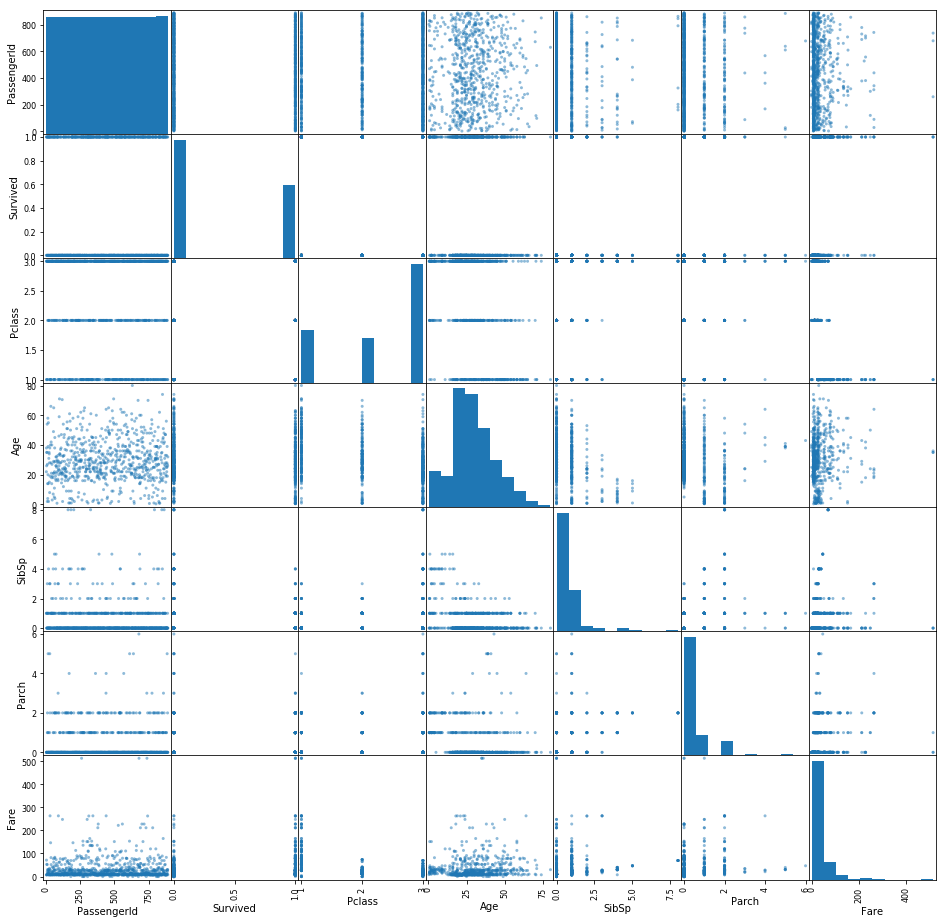

In [9]:
#let's see the correlation between different attributes
important_attribs=["Survived",'Embarked','Sex','Age','Fare','Ticket','PassengerId']
pd.plotting.scatter_matrix(dataset,figsize=(16,16))
plt.show()

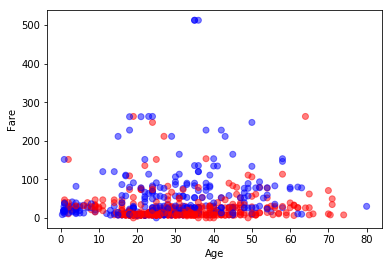

In [10]:
#as we can see there is no correlation between different values
#let's see if age and fare have something that will help in using linear regression (if used!)
plt.figure(0)
plt.scatter(dataset["Age"],dataset["Fare"],
            c=[i for i in map(lambda x: 'blue' if x==1 else 'red', dataset["Survived"])],
            alpha=0.5
           )
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [11]:
#As you can see it is not worth it for the linear regression ;)

In [12]:
#let's study all the data attributes first

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
dataset["PassengerId"]

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
861    862
862    863
863    864
864    865
865    866
866    867
867    868
868    869
869    870
870    871
871    872
872    873
873    874
874    875
875    876
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [15]:
#As we can see passenger id is just index it's pretty much useless :=)
#Survived is the output 
#let's see Pclass and Fare it is also very important
dataset.describe()
#it's passenger class it's very much useful for telling the class of the passenger (economic status)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#In pclass 1 means upper class
#Now to make a better feature let's add fare/pclass which is larger if we have better class and more fare (You know
#More rich!!)
dataset["FarePerClass"]=dataset["Fare"]/dataset["Pclass"]

In [17]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FarePerClass
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,25.046650
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,51.245594
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.641667
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,6.325000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,23.183333
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,512.329200


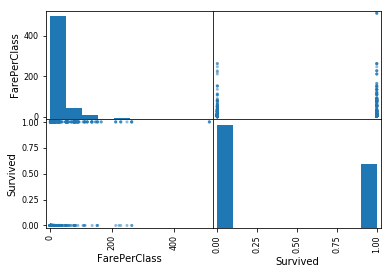

In [18]:
#let's see if it works ??
pd.plotting.scatter_matrix(dataset[["FarePerClass","Survived"]])
plt.show()

In [19]:
#let's see the correlation matrix
corr_matrix=dataset.corr()

In [20]:
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived        1.000000
FarePerClass    0.267627
Fare            0.257307
Parch           0.081629
PassengerId    -0.005007
SibSp          -0.035322
Age            -0.077221
Pclass         -0.338481
Name: Survived, dtype: float64


In [21]:
#let's rescale fare then do the fare per class (again)
dataset["Fare_scaled"]=(dataset["Fare"]-dataset["Fare"].mean())/dataset["Fare"].std()

In [22]:
dataset["FarePerClass_scaled"]=dataset["Fare_scaled"]/dataset["Pclass"]

In [23]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.077221
Pclass                -0.338481
Name: Survived, dtype: float64


In [24]:
#As we can see Fareperclass scaled is not working that good
#Even better is working the Pclass right? let's see the reciprocal of Pclass
dataset["Pclass_Reverse"]=4-dataset["Pclass"]

In [25]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
Pclass_Reverse         0.338481
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.077221
Pclass                -0.338481
Name: Survived, dtype: float64


In [26]:
#Only Pclass_Reverse and FarePerClass are highly correlated
#Even after including the fares Pclass is much better than FareperClass

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null object
Age                    714 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               889 non-null object
FarePerClass           891 non-null float64
Fare_scaled            891 non-null float64
FarePerClass_scaled    891 non-null float64
Pclass_Reverse         891 non-null int64
dtypes: float64(5), int64(6), object(5)
memory usage: 111.5+ KB


In [28]:
dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
dataset["Sex_num"]=[i for i in map(lambda x: 0 if x=='male' else 1 , dataset["Sex"])]

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null object
Age                    714 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               889 non-null object
FarePerClass           891 non-null float64
Fare_scaled            891 non-null float64
FarePerClass_scaled    891 non-null float64
Pclass_Reverse         891 non-null int64
Sex_num                891 non-null int64
dtypes: float64(5), int64(7), object(5)
memory usage: 118.4+ KB


In [31]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
Sex_num                0.543351
Pclass_Reverse         0.338481
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.077221
Pclass                -0.338481
Name: Survived, dtype: float64


In [32]:
#As you can see Gender has a very good correlation on it
#let's see if we can do something with the name
dataset["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [33]:
#let's find some meaning in this name
Name_extract=[]
for i in dataset["Name"]:
    j=0
    for j in range(len(i)):
        if i[j]==',':
            break
    Name_extract.append(i[:j])

In [113]:
#Let's add it to dataset
dataset["Name_Extract"]=Name_extract
print(Name_extract)

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran', 'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell', 'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice', 'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley', 'McGowan', 'Sloper', 'Palsson', 'Asplund', 'Emir', 'Fortune', "O'Dwyer", 'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer', 'Holverson', 'Mamee', 'Cann', 'Vander Planke', 'Nicola-Yarred', 'Ahlin', 'Turpin', 'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll", 'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper', 'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West', 'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart', 'Moubarek', 'Nye', 'Crease', 'Andersson', 'Kink', 'Jenkin', 'Goodwin', 'Hood', 'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell', 'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett', 'Backstrom', 'Ford', 'Slocovski', 'Fortune', 'Celotti', 'Chris

In [35]:
dataset["Name_Extract"].value_counts()

Andersson       9
Sage            7
Goodwin         6
Panula          6
Skoog           6
Johnson         6
Carter          6
Rice            5
Harris          4
Smith           4
Kelly           4
Brown           4
Baclini         4
Palsson         4
Hart            4
Harper          4
Ford            4
Williams        4
Fortune         4
Gustafsson      4
Lefebre         4
Asplund         4
Johansson       3
O'Brien         3
Allison         3
Meyer           3
West            3
Moran           3
Laroche         3
Goldsmith       3
               ..
Watson          1
Leinonen        1
Mack            1
Adahl           1
Foo             1
Calderhead      1
Toomey          1
Perreault       1
Fry             1
Burns           1
Byles           1
Crease          1
Weisz           1
Davis           1
Jalsevac        1
Kvillner        1
Woolner         1
Touma           1
Roebling        1
Kirkland        1
Ayoub           1
Pettersson      1
Coelho          1
Scanlan         1
Augustsson

In [36]:
dataset["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [37]:
print(dataset["Name_Extract"].value_counts())

Andersson       9
Sage            7
Goodwin         6
Panula          6
Skoog           6
Johnson         6
Carter          6
Rice            5
Harris          4
Smith           4
Kelly           4
Brown           4
Baclini         4
Palsson         4
Hart            4
Harper          4
Ford            4
Williams        4
Fortune         4
Gustafsson      4
Lefebre         4
Asplund         4
Johansson       3
O'Brien         3
Allison         3
Meyer           3
West            3
Moran           3
Laroche         3
Goldsmith       3
               ..
Watson          1
Leinonen        1
Mack            1
Adahl           1
Foo             1
Calderhead      1
Toomey          1
Perreault       1
Fry             1
Burns           1
Byles           1
Crease          1
Weisz           1
Davis           1
Jalsevac        1
Kvillner        1
Woolner         1
Touma           1
Roebling        1
Kirkland        1
Ayoub           1
Pettersson      1
Coelho          1
Scanlan         1
Augustsson

In [38]:
dataset["Name"].value_counts()

Boulos, Mrs. Joseph (Sultana)                     1
Saad, Mr. Khalil                                  1
Carter, Mr. William Ernest                        1
Daly, Mr. Peter Denis                             1
Keefe, Mr. Arthur                                 1
Young, Miss. Marie Grice                          1
Larsson, Mr. Bengt Edvin                          1
Ryerson, Miss. Susan Parker "Suzette"             1
Kiernan, Mr. Philip                               1
Leeni, Mr. Fahim ("Philip Zenni")                 1
Lennon, Mr. Denis                                 1
Bowerman, Miss. Elsie Edith                       1
Carbines, Mr. William                             1
Doling, Mrs. John T (Ada Julia Bone)              1
Lindblom, Miss. Augusta Charlotta                 1
Bradley, Mr. George ("George Arthur Brayton")     1
Thorneycroft, Mr. Percival                        1
Jalsevac, Mr. Ivan                                1
Webber, Miss. Susan                               1
Culumovic, M

In [39]:
#since all the names of the people are unique (of course!!)
#So, may be they are not that useful

In [40]:
#let's see ticket
dataset["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

In [41]:
#Since we know the pclass, fare of the ticket it's very much likely that Ticket is pretty much useless

In [42]:
#let's see Cabin
dataset["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
C22 C26        3
F2             3
E101           3
F33            3
B5             2
C68            2
C52            2
B49            2
C125           2
B58 B60        2
E44            2
E25            2
C78            2
C126           2
C92            2
D20            2
F4             2
E24            2
B18            2
B77            2
B51 B53 B55    2
C123           2
E33            2
B22            2
C2             2
D26            2
              ..
A16            1
D6             1
E77            1
E17            1
D30            1
E12            1
B94            1
D50            1
C104           1
C70            1
A34            1
A23            1
A31            1
A7             1
B69            1
D48            1
E63            1
B19            1
C45            1
C46            1
C99            1
D21            1
D11            1
C47            1
E46            1
B79            1
E50            1
E10           

In [43]:
#instead of Cabin number and all all we need is the Cabin Deck i.e. Only alphabetical letter no numbers
#check on https://www.encyclopedia-titanica.org/cabins.html
#so cabin deck is simply
dataset["Cabin_Deck"]=[i for i in map(lambda x: x[0] if type(x)==str else 'U' , dataset["Cabin"])]

In [44]:
dataset["Cabin_Deck"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Deck, dtype: int64

In [45]:
dict_cabin={'U': 0, 'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}

In [46]:
dataset["Cabin_num"]=[dict_cabin[i] for i in dataset["Cabin_Deck"]]

In [47]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
Sex_num                0.543351
Pclass_Reverse         0.338481
Cabin_num              0.287944
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.077221
Pclass                -0.338481
Name: Survived, dtype: float64


In [48]:
dataset["Age"].fillna(value=dataset["Age"].mean(),inplace=True)

In [49]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
Sex_num                0.543351
Pclass_Reverse         0.338481
Cabin_num              0.287944
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.069809
Pclass                -0.338481
Name: Survived, dtype: float64


In [50]:
dataset["Embarked"].value_counts()
dict_embarked={'S':0,'C':1,'Q':2}

In [51]:
dataset["Embarked_num"]=[i for i in map(lambda x: dict_embarked[x] if type(x) is str else -1,dataset["Embarked"])]

In [52]:
#let's see the corr_matrix
corr_matrix=dataset.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived               1.000000
Sex_num                0.543351
Pclass_Reverse         0.338481
Cabin_num              0.287944
FarePerClass           0.267627
Fare_scaled            0.257307
Fare                   0.257307
FarePerClass_scaled    0.236253
Embarked_num           0.101849
Parch                  0.081629
PassengerId           -0.005007
SibSp                 -0.035322
Age                   -0.069809
Pclass                -0.338481
Name: Survived, dtype: float64


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null object
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               889 non-null object
FarePerClass           891 non-null float64
Fare_scaled            891 non-null float64
FarePerClass_scaled    891 non-null float64
Pclass_Reverse         891 non-null int64
Sex_num                891 non-null int64
Name_Extract           891 non-null object
Cabin_Deck             891 non-null object
Cabin_num              891 non-null int64
Embarked_num           891 non-null in

In [54]:
dataset["Age"]
count=0
for i in dataset["Age"]:
    if i<=1.0:
        count+=1
print(count)

14


In [55]:
#Now that we have seen all the attributes we have concluded
#PassendgerId is irrelevant
#Pclass is very important ( A good correlation if reversed)
#Name not that important
#Sex the most imortant convert to numerical male 0 and female 1
#let's leave Age (for Now!)
#SibSp is least correlated Guess have to leave it for linear regression
#Parch is same leave it for linear regression only!
#Ticket is unique pretty much useless
#Fare is ok standardize it that's it
#Cabin in Cabin_num is fine
#Embarked in Embarked_num is also doing good

In [56]:
#So here's the pipeline of linear regression
#First let's make the DataFrameSelector , it's pretty useful

class DataFrameSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,attrib_names):
        self.attributes=attrib_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self.attributes]

In [57]:
#transform pclass and fare
class TransformPclassAndFare(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X[:,0]=2-X[:,0]
        X[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
        
        return X

In [58]:
#then we will use the imputer and after that standard scaler 
#so here's the numerical pipeline
important_num_attribs=['Pclass','Fare']
num_pipeline=Pipeline([('selector',DataFrameSelector(important_num_attribs)),
                       ('imputer',Imputer(strategy='mean')),
                       ('transfrom', TransformPclassAndFare())
                      ])

In [59]:
#Now let's create the category pipeline
#First is the Data Selector itself 
important_class_attribs=['Sex','Cabin','Embarked']
#Now let's fill Cabin and Embarked

In [60]:
check=0
class FillAndTransformCabinAndEmbarked(BaseEstimator,TransformerMixin):
    
    dict_cabin={'U': 0, 'A': 1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
    dict_embarked={'S':0,'C':1,'Q':2}
    def __int__(self):
        pass
    
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        
        list_cabin=[i for i in map(lambda x: x[0] if type(x)==str else 'U' , X["Cabin"])]
        list_cabin=[dict_cabin[i] for i in list_cabin]
        #Transformed Cabin_num
        
        list_embarked=[i for i in map(lambda x: dict_embarked[x] if type(x) is str else -1,X["Embarked"])]
        #Transformed  Embarked
        
        list_sex=[i for i in map(lambda x: 0 if x=='male' else 1 , X["Sex"])]
        
        data=np.asarray([list_sex,list_cabin,list_embarked]).T
        
        return pd.DataFrame(data=data,columns=["Sex","Cabin","embarked"])

Transform_Cat=FillAndTransformCabinAndEmbarked()

In [61]:
#now that all of it has been lablled let's complete the pipeline
cat_pipeline=Pipeline([('selector',DataFrameSelector(important_class_attribs)),
                       ('transform_at',Transform_Cat) 
                      ])

In [62]:
linear_reg_pipeline=FeatureUnion(transformer_list=[
    ('numerical',num_pipeline),
    ('categorial',cat_pipeline)
])

In [278]:
#Now let's reload the data back U Know to start
dataset=pd.read_csv('./train.csv')

In [279]:
X_train=dataset.drop('Survived',axis=1)

In [280]:
y_train=dataset["Survived"]

In [66]:
X_train_prepared=linear_reg_pipeline.fit_transform(X_train)

In [67]:
print(type(X_train_prepared))

<class 'numpy.ndarray'>


In [68]:
print(X_train_prepared.shape)

(891, 5)


In [69]:
#let's train it on linear regression

In [70]:
log_reg=LogisticRegression()

In [71]:
log_reg.fit(X_train_prepared,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_train_pred=log_reg.predict(X_train_prepared)

In [73]:
error=mean_squared_error(y_train_pred,y_train)
print(np.sqrt(error))

0.461783008108


In [74]:
print(mean_absolute_error(y_train,y_train_pred))

0.213243546577


In [75]:
print(np.abs(y_train-y_train_pred).sum())

190


In [76]:
print(190/891)

0.2132435465768799


In [77]:
#80% accuracy :(
#not so good let's use RandomForestClassifier

In [78]:
for_reg=RandomForestClassifier(random_state=50)

In [79]:
for_reg.fit(X_train_prepared,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [80]:
y_train_pred=log_reg.predict(X_train_prepared)

In [81]:
print(np.abs(y_train-y_train_pred).sum())

190


In [82]:
print(y_train_pred)

[0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

In [83]:
print(list(y_train))

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [84]:
#let's use Cross Validation
CV_lin=cross_val_score(estimator=log_reg,cv=3,scoring='neg_mean_absolute_error',X=X_train_prepared,y=y_train)

In [85]:
print(-CV_lin)

[ 0.23905724  0.21885522  0.22895623]


In [86]:
#let's grid search the best linear regression i.e. find the best params
#class_weight
#Solver {'newton-cg', 'lbfgs', 'liblinear', 'sag'} can take these values check between newton and liblinear
#multiclass ovr or ovo. (one vs rest or one vs one)

In [87]:
print(X_train_prepared)
print("Pclass  Fare Sex Cabin Embarked")

[[-1.         -0.50244517  0.          0.          0.        ]
 [ 1.          0.78684529  1.          3.          1.        ]
 [-1.         -0.48885426  1.          0.          0.        ]
 ..., 
 [-1.         -0.17626324  1.          0.          0.        ]
 [ 1.         -0.04438104  0.          3.          1.        ]
 [-1.         -0.49237783  0.          0.          2.        ]]
Pclass  Fare Sex Cabin Embarked


In [88]:
#let's declare the Parameter grid

In [89]:
Param_Grid=[
    {'fit_intercept': [True,False],'tol': [ 0.00001,0.0001,0.000001],'max_iter':[100,1000,10000]}
]

In [90]:
grid_log=GridSearchCV(estimator=log_reg,param_grid=Param_Grid,scoring='neg_mean_absolute_error',cv=3)

In [91]:
grid_log.fit(X=X_train_prepared,y=y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'fit_intercept': [True, False], 'tol': [1e-05, 0.0001, 1e-06], 'max_iter': [100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [92]:
score=grid_log.cv_results_

In [93]:
print(-score['mean_test_score'])

[ 0.22895623  0.22895623  0.22895623  0.22895623  0.22895623  0.22895623
  0.22895623  0.22895623  0.22895623  0.29741863  0.29741863  0.29741863
  0.29741863  0.29741863  0.29741863  0.29741863  0.29741863  0.29741863]


In [94]:
grid_log.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

In [95]:
grid_log.best_params_

{'fit_intercept': True, 'max_iter': 100, 'tol': 1e-05}

In [96]:
#let's check for random forests classifier
Param_Grid_Forests=[
    {'n_estimators': [2,3,4,5],'max_features': [3,4,5]}
]

In [97]:
grid_for=GridSearchCV(estimator=for_reg,param_grid=Param_Grid_Forests,cv=3,scoring='neg_mean_absolute_error')

In [98]:
grid_for.fit(X=X_train_prepared,y=y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [2, 3, 4, 5], 'max_features': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [99]:
grid_for.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [100]:
grid_for.best_score_

-0.20650953984287318

In [101]:
#Guess what??
#We are not able to take the accuracy above 80%
#let's re-create our dataset and include more attributes

In [287]:
#let's create a powerful class so that we can alter any attribute we want
#let's first do it for numerical attributes
dataset_columns=dataset.drop(['Survived'],axis=1).columns
class Transform(BaseEstimator,TransformerMixin):
    
    
    def __init__(self,select_dict={},default=False,list_of_attributes=dataset_columns):
        self.attributes=select_dict
        
        for i in list_of_attributes:
            if i not in self.attributes:
                self.attributes[i]=default
        self.func={
            'PassengerId': self._transform_PassengerId, 
            'Pclass': self._transform_Pclass, 
            'Name': self._transfrom_Name, 
            'Sex': self._transform_Sex, 
            'Age': self._transform_Age, 
            'SibSp': self._transform_SibSp,
            'Parch': self._transfrom_Parch, 
            'Ticket': self._transform_Ticket, 
            'Fare': self._transform_Fare, 
            'Cabin': self._transform_Cabin, 
            'Embarked': self._transform_Embarked
        }
        self.Transformed_Data=[]
        
    def fit(self,X,y=None):
        return self
    
    def _transform_PassengerId(self,X):
        #Not much to do!!
        return self.Transformed_Data.append(X)
    
    def _transform_Pclass(self,X):
        return self.Transformed_Data.append(4-X)
    
    def _transfrom_Name(self,X):
        Extracted_List=[]
        for i in X:
            for j in range(len(i)):
                if i[j]==',':
                    break
            Extracted_List.append(i[:j])
        #first name extraction done
        #Now encoding labels ;) don't want to use LabelEncoder!
        labels={}
        count=0
        for i in range(len(Extracted_List)):
            if Extracted_List[i] not in labels:
                labels[Extracted_List[i]]=count
                count+=1
            Extracted_List[i]=labels[Extracted_List[i]]
        return self.Transformed_Data.append(pd.DataFrame(data=Extracted_List,columns=['Name']))
    
    def _transform_Sex(self,X):
        Transformed_list=[i for i in map(lambda x: 0 if x=='male' else 1,X)]
        return self.Transformed_Data.append(pd.DataFrame(data=Transformed_list,columns=['Sex']))
    
    def _transform_Age(self,X):
        #I don't know about Age yet but let's do something
        fill=X.mean()
        Age=X.copy()
        return self.Transformed_Data.append(Age.fillna(fill))
    
    def _transform_SibSp(self,X):
        #Not much to do 
        return self.Transformed_Data.append(X)
    
    def _transfrom_Parch(self,X):
        #Here as well!! Not much to do
        return self.Transformed_Data.append(X)
    
    def _transform_Ticket(self,X):
        Ticket_list=[]
        labels={}
        count=0
        for i in X:
            if i not in labels:
                labels[i]=count
                count+=1
            Ticket_list.append(labels[i])
        
        return self.Transformed_Data.append(pd.DataFrame(data=Ticket_list,columns=['Ticket']))
    
    def _transform_Fare(self,X):
        Fare_scaled=X.copy()
        Fare_scaled.fillna(Fare_scaled.mean(),inplace=True)
        Fare_scaled=(Fare_scaled-Fare_scaled.mean())/Fare_scaled.std()
        return self.Transformed_Data.append(Fare_scaled)
    
    def _transform_Cabin(self,X):
        list_Cabin=[i for i in map(lambda x: x[0] if type(x)==str else 'U',X)]
        #Converted to deck now 
        #Now converting to integers
        count=0
        labels={}
        for i in range(len(list_Cabin)):
            if list_Cabin[i] not in labels:
                labels[list_Cabin[i]]=count
                count+=1
            list_Cabin[i]=labels[list_Cabin[i]]
        #labels encoded to integers
        return self.Transformed_Data.append(pd.DataFrame(data=list_Cabin,columns=['Cabin']))
    
    def _transform_Embarked(self,X):
        labels={}
        count=0
        list_Embarked=[]
        for i in range(len(X)):
            if i not in labels:
                labels[X[i]]=count
                count+=1
            list_Embarked.append(labels[X[i]])
        return self.Transformed_Data.append(pd.DataFrame(data=list_Embarked,columns=["Embarked"]))
    
    def transform(self,X,y=None):
        self.Transformed_Data=[]
        for i in self.attributes:
            if self.attributes[i]:
                self.func[i](X[i])
        
        return pd.concat(self.Transformed_Data,axis=1)

In [108]:
X=dataset.drop(['Survived'],axis=1)

In [111]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [162]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
print("--------------1601----------------")
for i in range(len(dataset["Ticket"])):
    if dataset["Ticket"].iloc[i]=='1601':
        print(dataset["Name"].iloc[i])
print("--------------CA. 2343----------------")
for i in range(len(dataset["Ticket"])):
    if dataset["Ticket"].iloc[i]=='CA. 2343':
        print(dataset["Name"].iloc[i])        
print("--------------347082----------------")
for i in range(len(dataset["Ticket"])):
    if dataset["Ticket"].iloc[i]=='347082':
        print(dataset["Name"].iloc[i])  
print("--------------3101295----------------")
for i in range(len(dataset["Ticket"])):
    if dataset["Ticket"].iloc[i]=='3101295':
        print(dataset["Name"].iloc[i]) 

--------------1601----------------
Bing, Mr. Lee
Ling, Mr. Lee
Lang, Mr. Fang
Foo, Mr. Choong
Lam, Mr. Ali
Lam, Mr. Len
Chip, Mr. Chang
--------------CA. 2343----------------
Sage, Master. Thomas Henry
Sage, Miss. Constance Gladys
Sage, Mr. Frederick
Sage, Mr. George John Jr
Sage, Miss. Stella Anna
Sage, Mr. Douglas Bullen
Sage, Miss. Dorothy Edith "Dolly"
--------------347082----------------
Andersson, Mr. Anders Johan
Andersson, Miss. Ellis Anna Maria
Andersson, Miss. Ingeborg Constanzia
Andersson, Miss. Sigrid Elisabeth
Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)
Andersson, Miss. Ebba Iris Alfrida
Andersson, Master. Sigvard Harald Elias
--------------3101295----------------
Panula, Master. Juha Niilo
Panula, Master. Eino Viljami
Panula, Mr. Ernesti Arvid
Panula, Mrs. Juha (Maria Emilia Ojala)
Panula, Mr. Jaako Arnold
Panula, Master. Urho Abraham


In [195]:
#As we can see people with same ticket also have same names
#Now let's do check if people with same first names also have same ticket number or not
#As we have already extracted names in Name_extract, thus,
Name_extract_d=pd.Series(data=Name_extract)

In [225]:
Name_extract_d.value_counts()
#As we can see there are 9 Andersson but only 7 of them have same ticket thus we conclude that
#ticket number is also important and thus let's use a labledecoder

Andersson       9
Sage            7
Goodwin         6
Panula          6
Skoog           6
Johnson         6
Carter          6
Rice            5
Harris          4
Smith           4
Kelly           4
Brown           4
Baclini         4
Palsson         4
Hart            4
Harper          4
Ford            4
Williams        4
Fortune         4
Gustafsson      4
Lefebre         4
Asplund         4
Johansson       3
O'Brien         3
Allison         3
Meyer           3
West            3
Moran           3
Laroche         3
Goldsmith       3
               ..
Watson          1
Leinonen        1
Mack            1
Adahl           1
Foo             1
Calderhead      1
Toomey          1
Perreault       1
Fry             1
Burns           1
Byles           1
Crease          1
Weisz           1
Davis           1
Jalsevac        1
Kvillner        1
Woolner         1
Touma           1
Roebling        1
Kirkland        1
Ayoub           1
Pettersson      1
Coelho          1
Scanlan         1
Augustsson

In [226]:
#At last Alas!!!

In [227]:
#let's create our regressor Forest one
for_reg=RandomForestClassifier()

In [229]:
a={'a':0,'b':1}

In [246]:
#testing the function call whose name is stored in string
class testfunc:
    
    def __init__(self):
        pass
    
    def A_x(self,a):
        print(a)
        
    def B(self):
        x='x'
        func='A_'+x
        b='It works It works!!!'
        eval("self."func"("b")")

SyntaxError: invalid syntax (<ipython-input-246-138a39513c21>, line 14)

In [261]:
#Now let's create an object of transform
prepare_data=Transform(select_dict={'PassengerId': False},default=True)

In [288]:
predict_pipeline=Pipeline([
    ('Transformer',Transform(select_dict={'PassengerId': False},default=True)),
    ('Estimator',for_reg)
])

In [289]:
predict_pipeline.fit(X=X_train,y=y_train)

Pipeline(steps=[('Transformer', Transform(default=None, list_of_attributes=None, select_dict=None)), ('Estimator', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [290]:
y_train_pred=predict_pipeline.predict(X_train)

In [291]:
print(np.abs(y_train-y_train_pred).sum()/891*100)

1.57126823793


In [292]:
#now as we see the accuracy is good let's test it on test data

In [293]:
dataset_test=pd.read_csv('./test.csv')

In [294]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [296]:
y_test_pred=predict_pipeline.predict(dataset_test)

In [297]:
print(y_test_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [301]:
y_pred_d=pd.DataFrame(y_test_pred,columns=['Survived'])

In [302]:
result=pd.concat([dataset_test['PassengerId'],y_pred_d],axis=1)

In [303]:
print(result)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         1
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         1
390         1282         1
391         1283         1
392         1284         0
3

In [306]:
result.to_csv('./Results.csv',index=False)

In [308]:
joblib.dump(predict_pipeline,'./Titanic.pkl')

['./Titanic.pkl']